<a href="https://colab.research.google.com/github/iamantrikshverma/Data_Science_projects/blob/main/Customer_Transactions_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer_Transactions_data_science


# Data Loading

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/unclean_customer_data.csv')

# data checking

## check data

In [3]:
df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,8270,31.0,75851.592212,77.104268,17,129.724190
1,1860,48.0,44460.183764,61.349076,25,91.479265
2,6390,17.0,43677.755605,22.589956,9,130.573812
3,6191,34.0,48666.812544,82.069525,0,72.395846
4,6734,44.0,46080.334029,65.076915,3,156.399077


In [4]:
df.tail()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
10195,9671,39.0,39870.421785,25.272516,1,-11.548475
10196,4845,25.0,47530.350762,34.046823,18,172.787265
10197,9120,30.0,44544.515138,83.278677,11,20.551706
10198,5944,33.0,54071.917805,78.138947,24,4.974859
10199,7094,32.0,60210.836321,71.754048,12,73.295082


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         10200 non-null  int64  
 1   Age                 9943 non-null   float64
 2   Annual_Income       10200 non-null  float64
 3   Spending_Score      10200 non-null  float64
 4   Purchase_Frequency  10200 non-null  int64  
 5   Transaction_Amount  9944 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 478.3 KB


In [6]:
df.describe()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
count,10200.000000,9943.000000,10200.000000,10200.000000,10200.000000,9944.000000
mean,5466.655392,34.458212,50124.610200,50.587613,14.507255,100.190612
std,2591.699853,9.998262,14915.806974,28.628536,8.662804,49.846288
min,1001.000000,0.000000,-17177.834332,1.009234,0.000000,-86.593231
25%,3211.750000,28.000000,40002.275881,26.110644,7.000000,66.144312
50%,5485.000000,34.000000,50091.128413,50.287120,15.000000,100.177920
75%,7708.250000,41.000000,60290.094248,75.637159,22.000000,133.994751
max,9998.000000,69.000000,112218.425755,99.990069,29.000000,273.518342


In [7]:
df.describe(include='all')

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
count,10200.000000,9943.000000,10200.000000,10200.000000,10200.000000,9944.000000
mean,5466.655392,34.458212,50124.610200,50.587613,14.507255,100.190612
std,2591.699853,9.998262,14915.806974,28.628536,8.662804,49.846288
min,1001.000000,0.000000,-17177.834332,1.009234,0.000000,-86.593231
25%,3211.750000,28.000000,40002.275881,26.110644,7.000000,66.144312
50%,5485.000000,34.000000,50091.128413,50.287120,15.000000,100.177920
75%,7708.250000,41.000000,60290.094248,75.637159,22.000000,133.994751
max,9998.000000,69.000000,112218.425755,99.990069,29.000000,273.518342


# check missing value

In [8]:
df.isnull().sum()

,0
Customer_ID,0
Age,257
Annual_Income,0
Spending_Score,0
Purchase_Frequency,0
Transaction_Amount,256


missing value found

## check outliers/extrema

In [9]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

# lower bound and upper bound
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# identify outlier
outliers = df[(df < lower_bound) | (df > upper_bound)]

print("Outliers in 'df' using IQR method:")
outliers

Outliers in 'df' using IQR method:


,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10195,NaN,NaN,NaN,NaN,NaN,NaN
10196,NaN,NaN,NaN,NaN,NaN,NaN
10197,NaN,NaN,NaN,NaN,NaN,NaN
10198,NaN,NaN,NaN,NaN,NaN,NaN


there is no outliers in this df

## find duplicates

In [10]:
df.duplicated().sum()
df[df.duplicated()]

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
10000,2559,38.0,66438.209894,56.882298,5,48.718542
10001,1643,37.0,26926.838145,87.447052,12,114.220057
10002,5815,26.0,58271.625627,5.807924,11,122.703116
10003,2725,27.0,38458.397583,29.564048,24,125.003517
10004,6581,38.0,37706.290904,36.562449,16,130.025278
...,...,...,...,...,...,...
10195,9671,39.0,39870.421785,25.272516,1,-11.548475
10196,4845,25.0,47530.350762,34.046823,18,172.787265
10197,9120,30.0,44544.515138,83.278677,11,20.551706
10198,5944,33.0,54071.917805,78.138947,24,4.974859


duplicates found


# Data cleaning

In [22]:
missing_percentage = df.isnull().sum() * 100 / len(df)
print("Missing Value Percentage:\n", missing_percentage)


Missing Value Percentage:
 Customer_ID           0.0
Age                   0.0
Annual_Income         0.0
Spending_Score        0.0
Purchase_Frequency    0.0
Transaction_Amount    0.0
dtype: float64


In [12]:
# Identify columns with more than 30% missing values
columns_to_drop = missing_percentage[missing_percentage > 30].index

# Drop the identified columns
df = df.drop(columns=columns_to_drop)


In [13]:
df = df.dropna()

### remove outliers

In [25]:
lower_bound = lower_bound[df.columns]
upper_bound = upper_bound[df.columns]

# Remove rows with outliers
df_no_outliers = df[(df >= lower_bound) & (df <= upper_bound)].dropna()

# Display the DataFrame without outliers
print("\nDataFrame after removing outliers:")
df_no_outliers


DataFrame after removing outliers:


,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,8270,31.0,75851.592212,77.104268,17,129.724190
1,1860,48.0,44460.183764,61.349076,25,91.479265
2,6390,17.0,43677.755605,22.589956,9,130.573812
3,6191,34.0,48666.812544,82.069525,0,72.395846
4,6734,44.0,46080.334029,65.076915,3,156.399077
...,...,...,...,...,...,...
9995,1581,36.0,52367.411507,56.135947,8,52.485763
9996,4881,39.0,22129.594902,87.490917,10,154.563183
9997,4909,40.0,70678.683758,78.373340,2,105.550735
9998,2999,34.0,72935.015197,3.219935,28,200.391583


In [26]:
df.drop_duplicates(inplace=True)
df

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,8270,31.0,75851.592212,77.104268,17,129.724190
1,1860,48.0,44460.183764,61.349076,25,91.479265
2,6390,17.0,43677.755605,22.589956,9,130.573812
3,6191,34.0,48666.812544,82.069525,0,72.395846
4,6734,44.0,46080.334029,65.076915,3,156.399077
...,...,...,...,...,...,...
9995,1581,36.0,52367.411507,56.135947,8,52.485763
9996,4881,39.0,22129.594902,87.490917,10,154.563183
9997,4909,40.0,70678.683758,78.373340,2,105.550735
9998,2999,34.0,72935.015197,3.219935,28,200.391583


In [27]:
print("Number of duplicates after dropping:", df.duplicated().sum())


Number of duplicates after dropping: 0


In [28]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9311 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         9311 non-null   int64  
 1   Age                 9311 non-null   float64
 2   Annual_Income       9311 non-null   float64
 3   Spending_Score      9311 non-null   float64
 4   Purchase_Frequency  9311 non-null   int64  
 5   Transaction_Amount  9311 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 509.2 KB


In [29]:
df_no_outliers.describe()

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
count,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000
mean,5466.684244,34.395446,50102.972626,50.789651,14.485770,100.518737
std,2591.433640,9.671611,14497.336839,28.637456,8.656085,48.616855
min,1001.000000,9.000000,10043.359735,1.009234,0.000000,-33.541608
25%,3210.500000,28.000000,39996.580768,26.389945,7.000000,66.511668
50%,5491.000000,34.000000,50088.526584,50.515850,14.000000,100.188260
75%,7704.000000,41.000000,60216.759335,75.782976,22.000000,134.000285
max,9998.000000,60.000000,90687.289200,99.990069,29.000000,235.325036


In [30]:
df_no_outliers

,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,8270,31.0,75851.592212,77.104268,17,129.724190
1,1860,48.0,44460.183764,61.349076,25,91.479265
2,6390,17.0,43677.755605,22.589956,9,130.573812
3,6191,34.0,48666.812544,82.069525,0,72.395846
4,6734,44.0,46080.334029,65.076915,3,156.399077
...,...,...,...,...,...,...
9995,1581,36.0,52367.411507,56.135947,8,52.485763
9996,4881,39.0,22129.594902,87.490917,10,154.563183
9997,4909,40.0,70678.683758,78.373340,2,105.550735
9998,2999,34.0,72935.015197,3.219935,28,200.391583


In [43]:
df_no_outliers = df_no_outliers.drop('Customer_ID', axis=1)


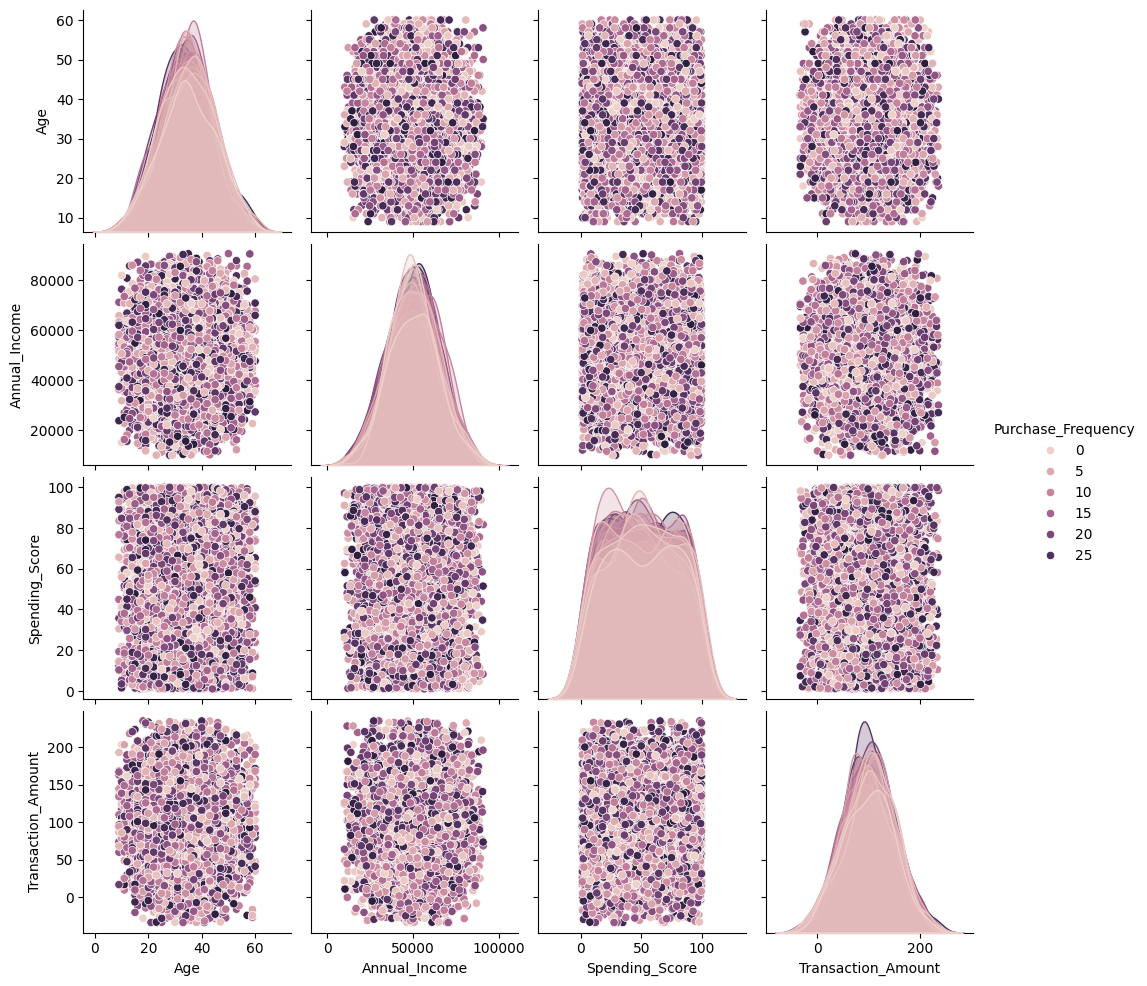

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_no_outliers, hue='Purchase_Frequency')
plt.show()


The pairplot reveals relationships between customer attributes, showing that Annual Income and Spending Score exhibit a normal distribution, while Purchase Frequency varies across features without clear linear correlations.

# model

In [45]:
# Check for missing values again after cleaning
print(df_no_outliers.isnull().sum())

Age                   0
Annual_Income         0
Spending_Score        0
Purchase_Frequency    0
Transaction_Amount    0
dtype: int64


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Assuming 'df_no_outliers' is your cleaned DataFrame
X = df_no_outliers.drop('Purchase_Frequency', axis=1)
y = df_no_outliers['Purchase_Frequency']

# Convert non-numeric columns to numerical representations
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42) # Use liblinear for smaller datasets
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))


Accuracy: 0.02844873859366613
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.13      0.05      0.07        61
           2       0.00      0.00      0.00        67
           3       0.02      0.08      0.03        61
           4       0.00      0.00      0.00        52
           5       0.00      0.00      0.00        59
           6       0.04      0.08      0.05        39
           7       0.01      0.08      0.02        53
           8       0.05      0.10      0.07        70
           9       0.00      0.00      0.00        60
          10       0.07      0.10      0.08        70
          11       0.03      0.21      0.06        57
          12       0.00      0.00      0.00        68
          13       0.00      0.00      0.00        69
          14       0.00      0.00      0.00        64
          15       0.00      0.00      0.00        53
          16       0.00      0.00      0.00        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


this dataset is not proper for classification and regression modeling
